In [1]:
import pandas as pd
import numpy as np

In [2]:
#little noise
import json

auction_result=json.load(open('../data/auction_match0.json'))
hungarin_result=json.load(open('../data/hungarian_match_0.json'))
graph_result=json.load(open('../data/graph_match_0.json'))


In [3]:
from typing import Dict

def extract_metric(result:Dict,metric:str):
    assert metric in ['accuracy','precision','recall']
    metrics=[]
    for _,ego_preds in result.items():
        for _,preds in ego_preds.items():
            metrics.extend([pred[metric] for pred in preds])
    return metrics
# extract_metric(auction_result,'precision')

In [4]:
auction_precision=extract_metric(auction_result,'precision')
hungarin_precision=extract_metric(hungarin_result,'precision')
graph_precision=extract_metric(graph_result,'precision')

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

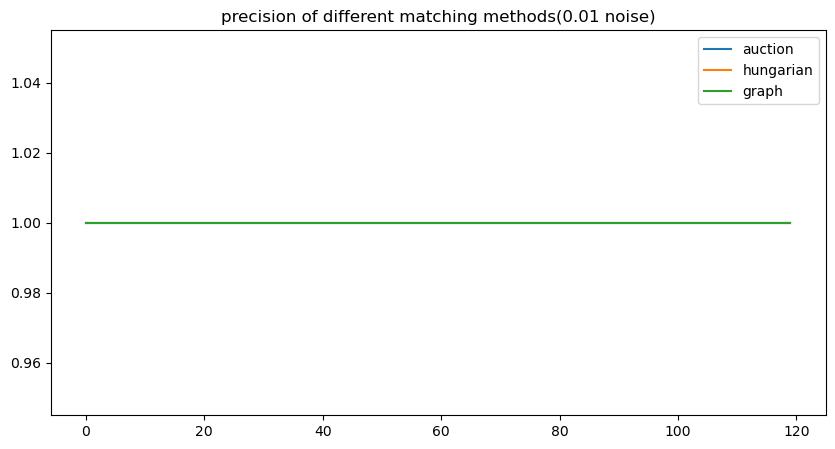

In [6]:
def plot_metric(metric:str,title:str):
  auction_metric=extract_metric(auction_result,metric)
  hungarin_metric=extract_metric(hungarin_result,metric)
  graph_metric=extract_metric(graph_result,metric)
  plt.figure(figsize=(10,5))
  plt.plot(auction_metric,label='auction')
  plt.plot(hungarin_metric,label='hungarian')
  plt.plot(graph_metric,label='graph')
  plt.title(title)
  plt.legend()
  plt.show()
plot_metric('precision','precision of different matching methods(0.01 noise)')

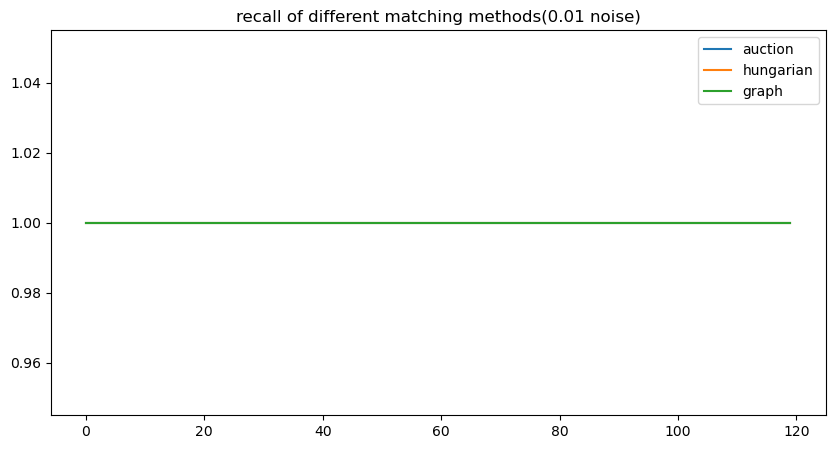

In [8]:
plot_metric('recall','recall of different matching methods(0.01 noise)')

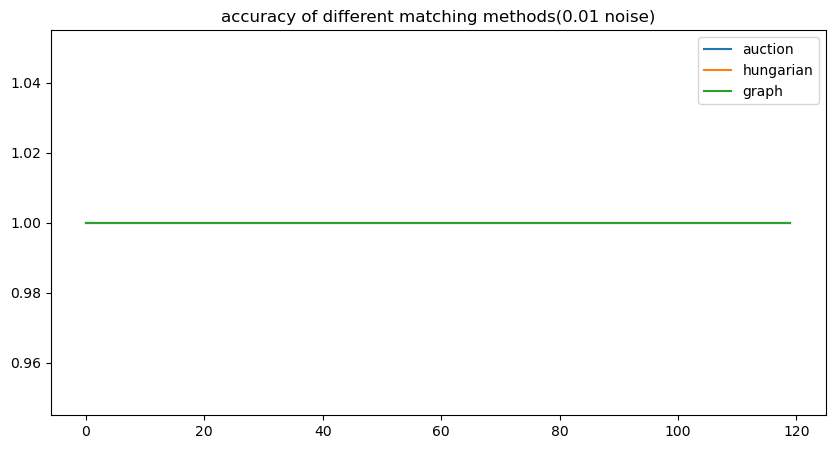

In [9]:
plot_metric('accuracy','accuracy of different matching methods(0.01 noise)')

In [20]:
auction_result=json.load(open('../data/auction_match1.json'))
hungarin_result=json.load(open('../data/hungarian_match_1.json'))
graph_result=json.load(open('../data/graph_match_1.json'))

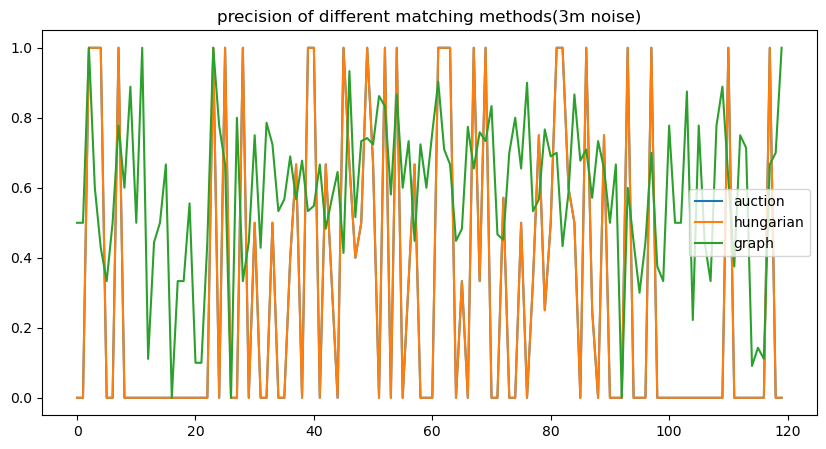

In [21]:
plot_metric('precision','precision of different matching methods(3m noise)')

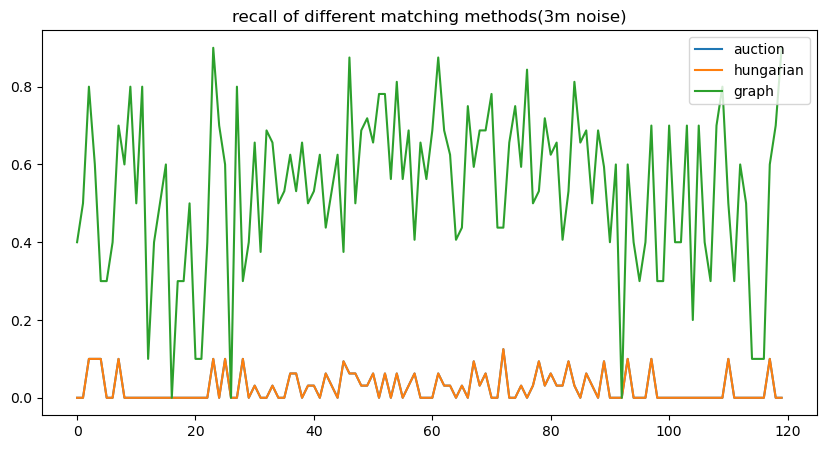

In [22]:
plot_metric('recall','recall of different matching methods(3m noise)')

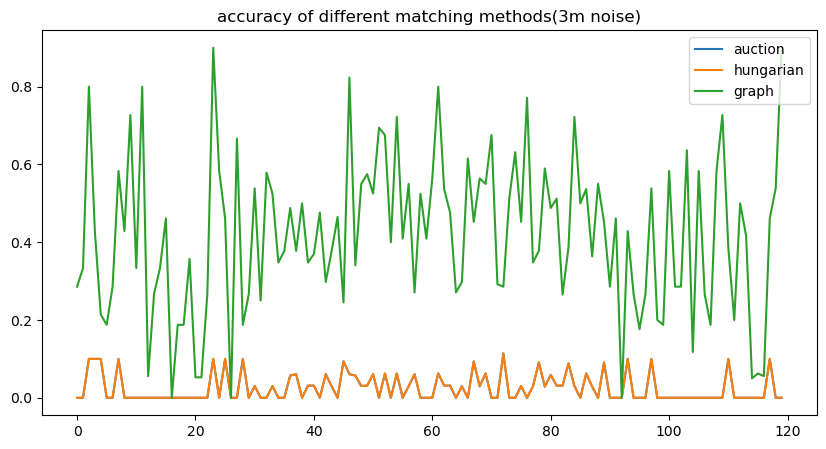

In [23]:
plot_metric('accuracy','accuracy of different matching methods(3m noise)')

In [25]:
def extract_mean_and_std(result:Dict,metric:str):
    assert metric in ['accuracy','precision','recall']
    metrics=[]
    for _,ego_preds in result.items():
        for _,preds in ego_preds.items():
            metrics.append([pred[metric] for pred in preds])
    return np.mean(metrics),np.std(metrics)
print(extract_mean_and_std(auction_result,'precision'))

(0.30809523809523814, 0.40971115131666536)


In [26]:
auction_dict={
  'precision':extract_mean_and_std(auction_result,'precision'),
  'recall':extract_mean_and_std(auction_result,'recall'),
  'accuracy':extract_mean_and_std(auction_result,'accuracy')
}
hungarin_dict={
  'precision':extract_mean_and_std(hungarin_result,'precision'),
  'recall':extract_mean_and_std(hungarin_result,'recall'),
  'accuracy':extract_mean_and_std(hungarin_result,'accuracy')
}
graph_dict={
  'precision':extract_mean_and_std(graph_result,'precision'),
  'recall':extract_mean_and_std(graph_result,'recall'),
  'accuracy':extract_mean_and_std(graph_result,'accuracy')
}
auction_df=pd.DataFrame(auction_dict,index=['mean','std'])
hungarin_df=pd.DataFrame(hungarin_dict,index=['mean','std'])
graph_df=pd.DataFrame(graph_dict,index=['mean','std'])
graph_df

,precision,recall,accuracy
mean,0.587831,0.536146,0.418378
std,0.222899,0.205811,0.201385


In [29]:
df=pd.concat([auction_df,hungarin_df,graph_df],axis=1,keys=['auction','hungarian','graph'])
df

auction                     hungarian                         graph  \
     precision    recall  accuracy precision    recall  accuracy precision   
mean  0.308095  0.025833  0.025291  0.308095  0.025833  0.025291  0.587831   
std   0.409711  0.036380  0.035762  0.409711  0.036380  0.035762  0.222899   

                          
        recall  accuracy  
mean  0.536146  0.418378  
std   0.205811  0.201385

<Axes: title={'center': 'mean and std of different matching methods(0.01 noise)'}>

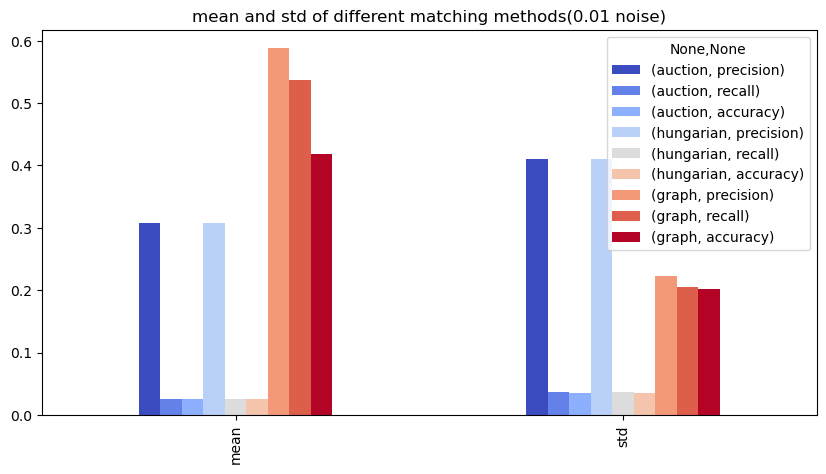

In [37]:
df.plot(kind='bar',figsize=(10,5),title='mean and std of different matching methods(0.01 noise)',colormap='coolwarm')